# PROJET DE MACHINE LEARNING

## ANALYSE DU DATASET ET CHOIX DES FEATURES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv("framingham.csv")

In [3]:
dataset.shape

(4240, 16)

In [4]:
# DATASET

dataset.drop(['education'], inplace = True, axis = 1)
dataset.rename(columns = {'male':'Sex_male'}, inplace = True)

#Suppression des données manquantes
dataset.interpolate(axis = 0, inplace = True)

In [5]:
dataset.shape

(4240, 15)

### TESTS STATISTIQUES (CHI-SQUARE TEST)

In [7]:
from scipy.stats import chi2_contingency

# Assuming 'A' and 'B' are the columns in your DataFrame
# You would replace these with the actual column names from your dataset

df = pd.read_csv("framingham.csv")
df.drop(['education'], inplace = True, axis = 1)
df.rename(columns = {'male':'Sex_male'}, inplace = True)

#Suppression des données manquantes
df.dropna(axis = 0, inplace = True)
A = list(df.keys()[:-1])

for name in A:
    
    observed_values = pd.crosstab(df[name], df['TenYearCHD']).values
    chi2, p, dof, expected = chi2_contingency(observed_values)
    significance_level = 0.05
    if p <= significance_level:
        print("reject null hypothesis")
    else:
        print("accept null hyposthesis")




reject null hypothesis
reject null hypothesis
accept null hyposthesis
accept null hyposthesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
accept null hyposthesis
reject null hypothesis


In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 10})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color="blue")
    plt.yticks(tick_marks, classes, color="blue")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## ENTRAINEMENT DES MODELES ET TESTS 

## LOGISTIC REGRESSION MODEL 

In [9]:
X = np.asarray(dataset[['age', 'Sex_male', 'BPMeds', 'prevalentStroke'
                            , 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
                            'diaBP','glucose']])
y = np.asarray(dataset['TenYearCHD'])

In [10]:
# Normalisation du dataset
X = StandardScaler().fit(X).transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [15]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, roc_auc_score, classification_report
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE

In [16]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Le recall et la precision et le recall
from sklearn.metrics import recall_score, precision_score
y_pred = model1.predict(X_test)

#¨Precision metrics
precision = precision_score(y_test, y_pred)
print("precision:", round(precision*100, 2), "%")

#recall metrics
# recall = recall_score(y_test, y_pred)
# print("recall:", round(recall, 2))

#F1-score Metrics
f1 = f1_score(y_test, y_pred)
print("f1_score:", round(f1, 2))
#print(y_pred)

score1 = model1.score(X_test, y_test)
score2 = model1.score(X_train, y_train)

#Precision in test:
print(f'Score_Test: {round(score1, 3)*100}', '%')
#print("Accuracy", metrics.accuracy_score(y_test, y_pred))
#Precision in training:
print(f'Score_Training: {round(score2, 3)*100}', '%')

precision: 71.43 %
f1_score: 0.08
Score_Test: 85.8 %
Score_Training: 85.2 %


[[723   2]
 [118   5]]


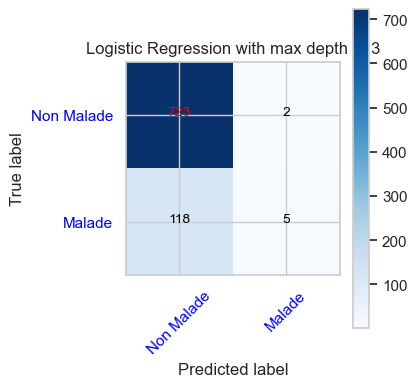

In [23]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="tab10", rc = {'figure.figsize':(9,6)})
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
import numpy as np
import itertools

cfm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cfm, classes=['Non Malade','Malade'],
                      title='Logistic Regression with max depth of 3')
tn, fp, fn, tp = cfm.ravel()

In [59]:
# plt.figure()
# plt.plot(X_train[:, 1], y_train)
# plt.show()

# sns.catplot(df)

## DECISION TREE 

In [25]:
X = np.asarray(dataset[['age', 'BPMeds', 'diabetes', 'totChol', 'BMI', 'glucose']])
y = np.asarray(dataset['TenYearCHD'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)
#new_train = pd.concat([X_res, y_res], axis=1)


model1 = DecisionTreeClassifier(criterion = "entropy", max_depth=3)

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

classRep = classification_report(y_test, y_pred)
#confMat = confusion_matrix(y_test, y_pred)

#¨Precision metrics
precision = precision_score(y_test, y_pred)
print("precision:", round(precision*100, 2), "%")

#recall metrics
# recall = recall_score(y_test, y_pred)
# print("recall:", round(recall, 2))

#F1-score Metrics
f1 = f1_score(y_test, y_pred)
print("f1_score:", round(f1, 2))
#print(y_pred)

score1 = model1.score(X_test, y_test)
score2 = model1.score(X_train, y_train)

#Precision in test:
print(f'Score_Test: {round(score1, 3)*100}', '%')
#print("Accuracy", metrics.accuracy_score(y_test, y_pred))
#Precision in training:
print(f'Score_Training: {round(score2, 3)*100}', '%')

precision: 25.0 %
f1_score: 0.03
Score_Test: 85.39999999999999 %
Score_Training: 84.6 %


### MATRICE DE CONFUSION DU DECISION TREE 

[[722   6]
 [118   2]]


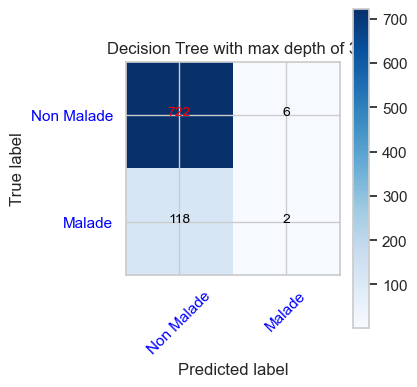

In [26]:
#CONFUSION MATRIX 

def scatter(x, y):
    plt.scatter(x, y)

    # Ajouter des étiquettes d'axe et un titre
    plt.xlabel('Axe X')
    plt.ylabel('Axe Y')
    plt.title('Nuage de points')

    # Afficher le nuage de points
    plt.show()
    

cfm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cfm, classes=['Non Malade','Malade'],
                      title='Decision Tree with max depth of 3')
tn, fp, fn, tp = cfm.ravel()

#scatter(data['cigsPerDay'], y)

## BAGGING 

In [28]:
from matplotlib import pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, roc_auc_score, classification_report
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE

## DIVISION DES DONNES EN 80% - 20% 

In [29]:
# Division des données en 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
model2 = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                          n_estimators=100)
model2.fit(X_train, y_train)
# print(model.score(X_test, y_test))
# print()

y_pred = model2.predict(X_test)

#¨Precision metrics
precision = precision_score(y_test, y_pred)
print("precision:", round(precision*100, 2), "%")

#recall metrics
# recall = recall_score(y_test, y_pred)
# print("recall:", round(recall, 2))

#F1-score Metrics
f1 = f1_score(y_test, y_pred)
print("f1_score:", round(f1, 2))
#print(y_pred)

score1 = model1.score(X_test, y_test)
score2 = model1.score(X_train, y_train)

#Precision in test:
print(f'Score_Test: {round(score1, 3)*100}', '%')
#print("Accuracy", metrics.accuracy_score(y_test, y_pred))
#Precision in training:
print(f'Score_Training: {round(score2, 3)*100}', '%')

precision: 25.81 %
f1_score: 0.1
Score_Test: 85.0 %
Score_Training: 84.7 %


### MATRICE DE CONFUSION DU BAGGING à 80% - 20% 

[[699  23]
 [118   8]]


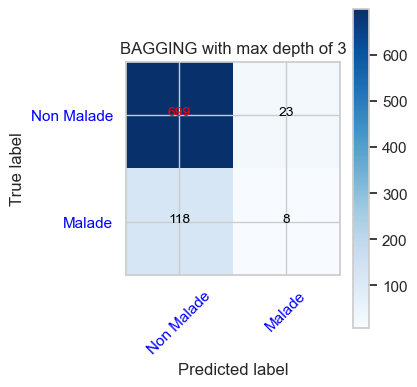

In [31]:
cfm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cfm, classes=['Non Malade','Malade'],
                      title='BAGGING with max depth of 3')
tn, fp, fn, tp = cfm.ravel()

## DIVISION DES DONNEES EN 60% - 40% 

In [32]:
# Division des données en 40% - 60%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [33]:
model3 = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                          n_estimators=100)
model3.fit(X1_train, y1_train)
# print(model.score(X1_test, y1_test))

y1_pred = model2.predict(X1_test)

#¨Precision metrics
precision = precision_score(y1_test, y1_pred)
print("precision:", round(precision*100, 2), "%")

#recall metrics
# recall = recall_score(y1_test, y1_pred)
# print("recall:", round(recall, 2))

#F1-score Metrics
f1 = f1_score(y1_test, y1_pred)
print("f1_score:", round(f1, 2))
#print(y_pred)

score1 = model1.score(X1_test, y1_test)
score2 = model1.score(X1_train, y1_train)

#Precision in test:
print(f'Score_Test: {round(score1, 3)*100}', '%')
#print("Accuracy", metrics.accuracy_score(y_test, y_pred))
#Precision in training:
print(f'Score_Training: {round(score2, 3)*100}', '%')

precision: 58.95 %
f1_score: 0.23
Score_Test: 84.89999999999999 %
Score_Training: 84.5 %


### MATRICE DE CONFUSION DU BAGGING à 60% - 40%

[[2123   39]
 [ 326   56]]


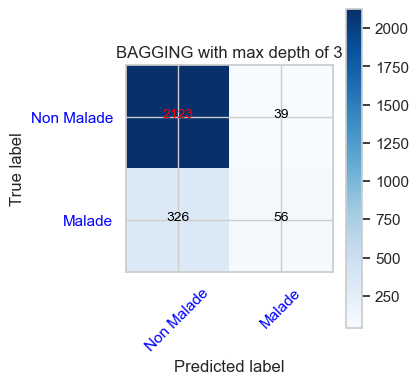

In [34]:
cfm = confusion_matrix(y1_test, y1_pred)
plot_confusion_matrix(cfm, classes=['Non Malade','Malade'],
                      title='BAGGING with max depth of 3')
tn, fp, fn, tp = cfm.ravel()

## PCA FOR FEATURES OF DATASET 

In [35]:
import pandas as pd
import numpy as np
import random as rd

mydata = pd.read_csv("framingham.csv")


In [36]:
mydata = pd.read_csv("framingham.csv")
mydata.fillna(mydata.mean(), inplace = True)
df = pd.DataFrame(mydata)

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [39]:
scaled_data = scaler.transform(df)

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components = 16)

In [42]:
pca.fit(scaled_data)

PCA(n_components=16)

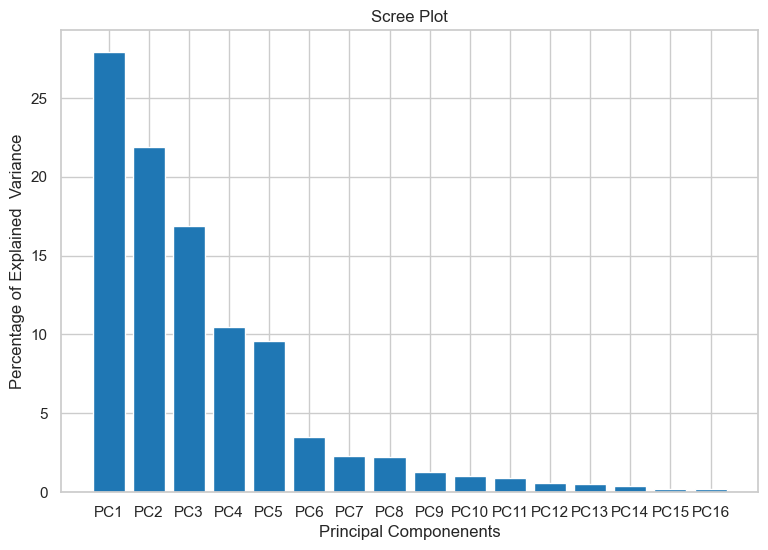

In [43]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x =range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained  Variance')
plt.xlabel('Principal Componenents')
plt.title('Scree Plot')
plt.show()

In [44]:
pca = PCA(n_components = 3)

In [45]:
pca.fit(scaled_data)

PCA(n_components=3)

In [46]:
xpca = pca.transform(scaled_data)

In [47]:
scaled_data.shape

(4240, 16)

In [48]:
xpca.shape

(4240, 3)

In [49]:
scaled_data

array([[1.        , 0.18421053, 1.        , ..., 0.36363636, 0.10451977,
        0.        ],
       [0.        , 0.36842105, 0.33333333, ..., 0.51515152, 0.10169492,
        0.        ],
       [1.        , 0.42105263, 0.        , ..., 0.31313131, 0.08474576,
        0.        ],
       ...,
       [0.        , 0.52631579, 0.33333333, ..., 0.36363636, 0.18926554,
        0.        ],
       [1.        , 0.21052632, 0.66666667, ..., 0.23232323, 0.09039548,
        0.        ],
       [0.        , 0.18421053, 0.66666667, ..., 0.41414141, 0.11299435,
        0.        ]])

Text(0, 0.5, 'PC2')

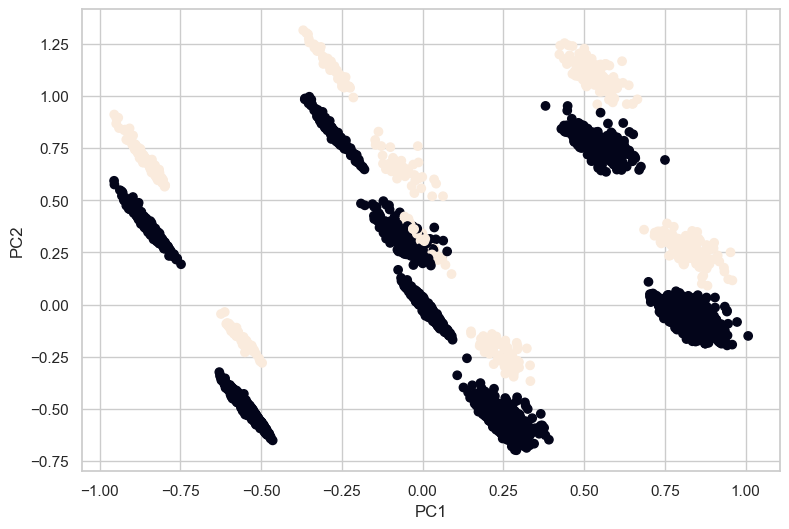

In [50]:
#plt.figure(figure = (0,6))
plt.scatter(xpca[:,0],xpca[:,1], c = df['TenYearCHD'])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [51]:
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
top_10_features = sorted_loading_scores[0:10]
top_10_features

3     0.739096
0     0.560280
7     0.256468
4     0.224375
1     0.115492
10    0.055156
11    0.046518
2     0.044188
5     0.041104
12    0.028277
dtype: float64

## DATA VISUALIZATION 

In [52]:
feature_names = mydata.columns.tolist()

In [53]:
TenYeardfN = mydata.groupby('TenYearCHD').get_group(0)
TenYeardfP = mydata.groupby('TenYearCHD').get_group(1)

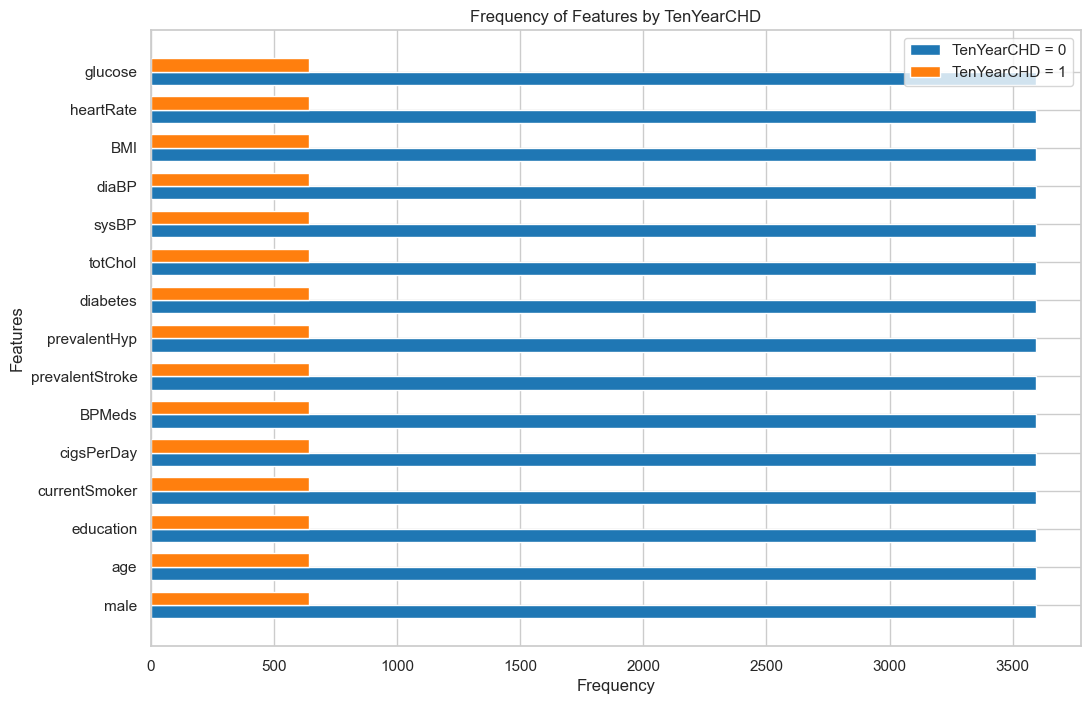

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Define the features
features = feature_names[:-1] 

# Define the bar width
bar_width = 0.35

# Define the index
index = np.arange(len(features))

# Define the frequency of each feature for each data frame
TenYeardfN_counts = [TenYeardfN[feature].count() for feature in features]
TenYeardfP_counts = [TenYeardfP[feature].count() for feature in features]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.barh(index, TenYeardfN_counts, bar_width, label='TenYearCHD = 0')
rects2 = ax.barh(index + bar_width, TenYeardfP_counts, bar_width, label='TenYearCHD = 1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Frequency')
ax.set_ylabel('Features')
ax.set_title('Frequency of Features by TenYearCHD')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(features)
ax.legend()

plt.show()
